In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
sess = tf.Session()

In [3]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [4]:
batch_size = 125

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [5]:
demming_numerator = tf.abs(tf.subtract(tf.add(tf.matmul(x_data, A), b), y_target))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [6]:
my_opt = tf.train.GradientDescentOptimizer(0.25)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [7]:
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[-3.22842598]] b = [[ 7.28261948]]
Loss = 0.99585
Step #200 A = [[-2.67571998]] b = [[ 9.09231567]]
Loss = 0.839979
Step #300 A = [[-3.08135295]] b = [[ 9.66392803]]
Loss = 0.807858
Step #400 A = [[-3.46189547]] b = [[ 10.11794281]]
Loss = 0.838899
Step #500 A = [[-3.78403378]] b = [[ 10.50854778]]
Loss = 0.810723
Step #600 A = [[-4.01649761]] b = [[ 10.91268063]]
Loss = 0.826139
Step #700 A = [[-4.2778554]] b = [[ 11.22489357]]
Loss = 0.783827
Step #800 A = [[-4.50523853]] b = [[ 11.53094101]]
Loss = 0.732808
Step #900 A = [[-4.71275187]] b = [[ 11.80969429]]
Loss = 0.765925
Step #1000 A = [[-4.9028163]] b = [[ 12.06077385]]
Loss = 0.766132
Step #1100 A = [[-5.10322332]] b = [[ 12.29133129]]
Loss = 0.831216
Step #1200 A = [[-5.25683212]] b = [[ 12.53208828]]
Loss = 0.719232
Step #1300 A = [[-5.42347479]] b = [[ 12.74838352]]
Loss = 0.72447
Step #1400 A = [[-5.55711937]] b = [[ 12.96613693]]
Loss = 0.733784
Step #1500 A = [[-5.71097803]] b = [[ 13.15473175]]
Loss = 0.729

In [8]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

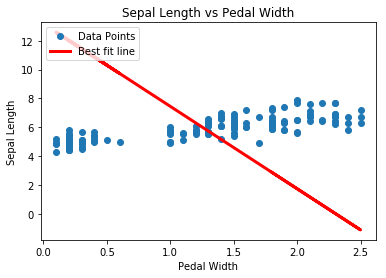

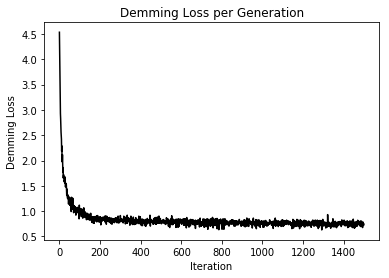

In [9]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title('Demming Loss per Generation')
plt.xlabel('Iteration')
plt.ylabel('Demming Loss')
plt.show()